In [1]:
#Used Car sales Data Analysis
#vehicle.csv is a dataset of craigslist add from people selling their vehicles
#The dataset consists of over 400,000 individual craigslists adds all based in America
#In this Project i will be looking into the vehicles dataset and with a combinations of Data Preprocessing, Data Visualization, 
#Data Mining i will show information on the dataset as well as using machine learning to predict the
#cost of a vehicle based on manufacturer, model, type and odometer.
#This Dataset was aquired from kaggle Used_Car_Sales


#Background
#https://towardsdatascience.com/predicting-car-price-using-machine-learning-8d2df3898f16
#The post linked above is from Tarique Akhtar. He also was using machine learning to predict the price of a car
#unlike him i will have much less columns to work while trying to achieve the same goal,One thing i do have tho is much more 
#rows as he is limited to 205 rows

#I will be using linear regression to predict the price of a vehicle



#Importing the necessary libraries for the project
import numpy as nm  
import matplotlib.pyplot as plt  
import seaborn as sb
import pandas as pd 
import statsmodels.api as sm

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
 
           
#Reading in the vehicles.csv file into df    
path= 'vehicles.csv'

df = pd.read_csv(path, sep=',')


In [2]:
#The vehicles dataset has 26 columns
#Some of these columns can be removed which will be done shortly
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [3]:
#The dataset has 426880 rows and 26 Columns
df.shape

(426880, 26)

In [4]:
#The types for each of the columns
df.dtypes

id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
posting_date     object
dtype: object

In [5]:
#Describing the dataset
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [6]:
#Information on the dataset such as column numbers, types, number of entries etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [7]:
#The first 5 items in the Dataset
df.head(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

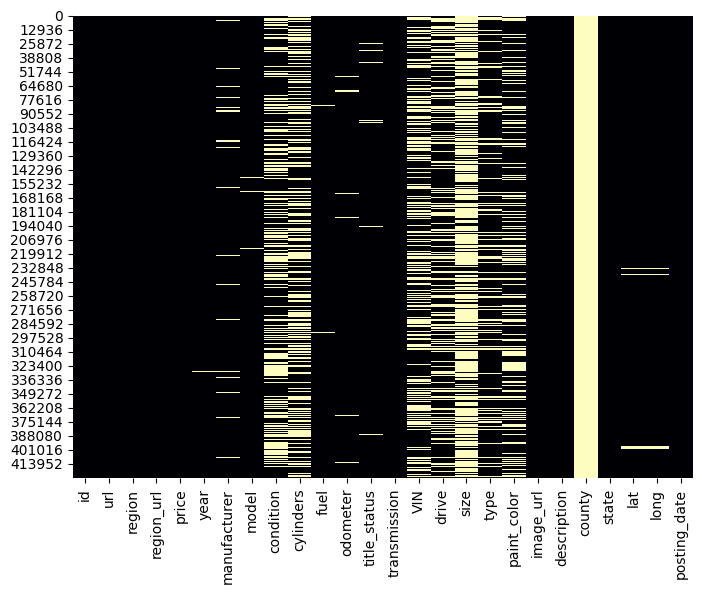

In [8]:
#Creating a heatmap to show the amount of null values in the dataset
#https://dev.to/tomoyukiaota/visualizing-the-patterns-of-missing-value-occurrence-with-python-46dj
plt.figure(figsize = (8,6))
sb.heatmap(df.isnull(), cbar=False , cmap = 'magma')
df.isnull().sum()

region          0
price           0
year            0
manufacturer    0
model           0
fuel            0
odometer        0
title_status    0
transmission    0
type            0
paint_color     0
description     0
state           0
lat             0
long            0
posting_date    0
dtype: int64

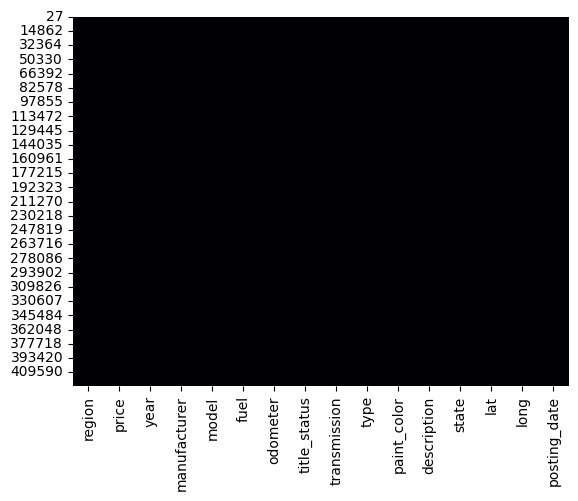

In [9]:
# droping columns as they are all Null or not needed
df.drop(['county','region_url','VIN','size','condition','cylinders', 'image_url','url','id','drive'], axis=1, inplace=True)
#dropping all rows that have null variables and displaying a heatmap to show the dataset after null values are removed
df.dropna(inplace=True)
sb.heatmap(df.isnull(), cbar=False , cmap = 'magma')
df.isnull().sum()

In [10]:
#Total number of remaining rows after the cleaning
print(len(df))
df.head()

247188


,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,paint_color,description,state,lat,long,posting_date
27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,gas,57923.0,clean,other,pickup,white,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,2021-05-04T12:31:18-0500
28,auburn,22590,2010.0,chevrolet,silverado 1500,gas,71229.0,clean,other,pickup,blue,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,2021-05-04T12:31:08-0500
29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,gas,19160.0,clean,other,pickup,red,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,2021-05-04T12:31:25-0500
30,auburn,30990,2017.0,toyota,tundra double cab sr,gas,41124.0,clean,other,pickup,red,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,2021-05-04T10:41:31-0500
31,auburn,15000,2013.0,ford,f-150 xlt,gas,128000.0,clean,automatic,truck,black,2013 F-150 XLT V6 4 Door. Good condition. Leve...,al,32.592,-85.5189,2021-05-03T14:02:03-0500


In [11]:
#The mean, max and min of year of the vehicles in the dataset.
df2=df["year"].mean()
print('Mean Year = ''%.0f'%df2)
df2=df["year"].max()
print('Maximum Year = ''%.0f'%df2)
df2=df["year"].min()
print('Minimum Year = ''%.0f'%df2)

Mean Year = 2012
Maximum Year = 2022
Minimum Year = 1900


In [12]:
#The mean, max and min of price of the vehicles in the dataset.
df2=df["price"].mean()
print('Mean Price = $''%.2f'%df2)
df2=df["price"].max()
print('Max Price = $''%.2f'%df2)
df2=df["price"].min()
print('Min Price = $''%.2f'%df2)

Mean Price = $40334.25
Max Price = $3736928711.00
Min Price = $0.00


In [13]:
#Removing rows where the price of the vehicle is under 100 dollers aswell as 
#removing the vehciles where their price is above 200,000 dollers.
#I did this as many prices on the dataset were far to low aswell as far to high. 
# This was put at >100 and < 200000.00 but unfortunatly my pc could not handle the amount of data in the data set so i had to drop more
df = df.loc[(df["price"]>200.00)]
df = df.loc[(df["price"]<100000.00)]

In [14]:
#This is the max, min and mean now that iv removed the rows that have unrealistic price values
df2_max=df["price"].max()
print('Max Price = $''%.2f'%df2_max)
df2_min = df["price"].min()
print('Min Price = $''%.2f'%df2_min)
df2_mean=df["price"].mean()
print('Mean Price = $''%.2f'%df2_mean)

Max Price = $99999.00
Min Price = $202.00
Mean Price = $19722.37


In [15]:
df.head(1)

,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,paint_color,description,state,lat,long,posting_date
27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,gas,57923.0,clean,other,pickup,white,Carvana is the safer way to buy a car During t...,al,32.59,-85.48,2021-05-04T12:31:18-0500


<function matplotlib.pyplot.show(close=None, block=None)>

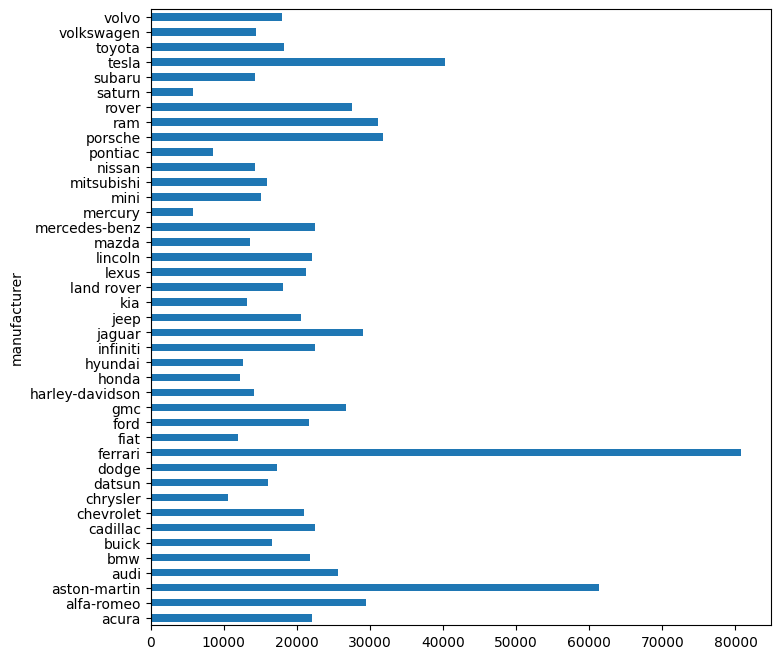

In [16]:
#Average Vehicle Price Based On Manufacturer
#importing figure from matplotlib so that i can change the size of the bar graph so it can be properly display
from matplotlib.pyplot import figure
allMakes =df.groupby("manufacturer")
averagePrice = allMakes['price'].mean()
figure(figsize=(8,8))
averagePrice.plot(kind='barh')
plt.show

<AxesSubplot: xlabel='paint_color', ylabel='count'>

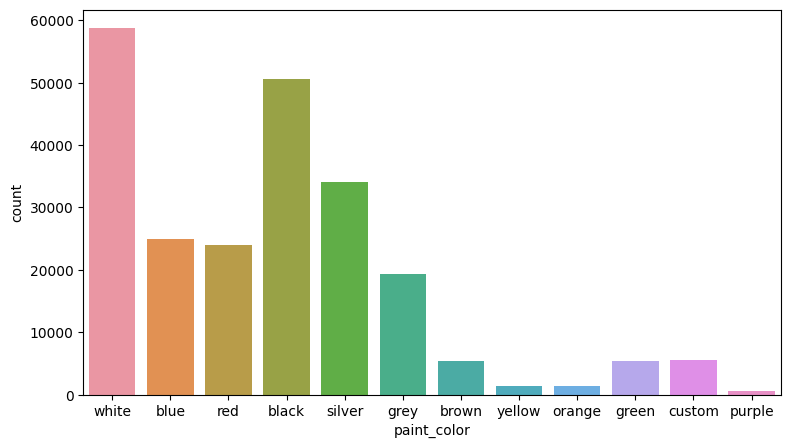

In [17]:
#Number of vehicles based on Color. Using plt.figure to change its size and sb.countplot to display the results
plt.figure(figsize=(9,5))
sb.countplot(x='paint_color', data=df)

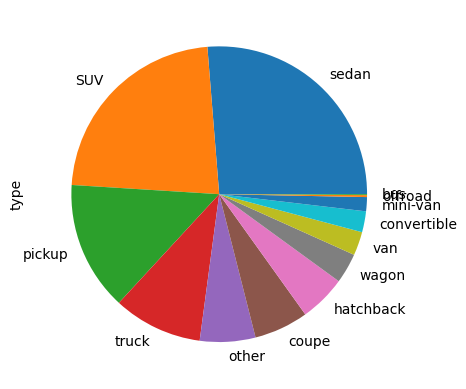

In [18]:
#This is a Pie chart showing the percentage of different types of vehicles
#https://www.w3schools.com/python/matplotlib_pie_charts.asp
df['type'].value_counts().plot.pie()
plt.gca().set_aspect('equal')

In [19]:
#Here i am just shoing the number of add for each state in America
df['state'].value_counts()

ca    25779
fl    16202
tx    13044
ny    11631
oh    10076
pa     8454
mi     7883
nc     7251
or     7090
wa     6900
tn     6320
co     6311
wi     6239
nj     5611
il     5581
va     5559
id     5543
az     5224
ma     5044
mn     4394
ia     4149
ga     3948
in     3562
ks     3471
ok     3148
sc     3146
ct     3026
md     2944
ky     2852
al     2843
ak     2658
mt     2271
nm     2239
mo     2178
nv     1999
dc     1841
nh     1752
vt     1638
la     1576
ar     1471
me     1402
hi     1367
ri     1324
ut      857
sd      710
wv      634
ne      595
de      529
ms      520
wy      370
nd      293
Name: state, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

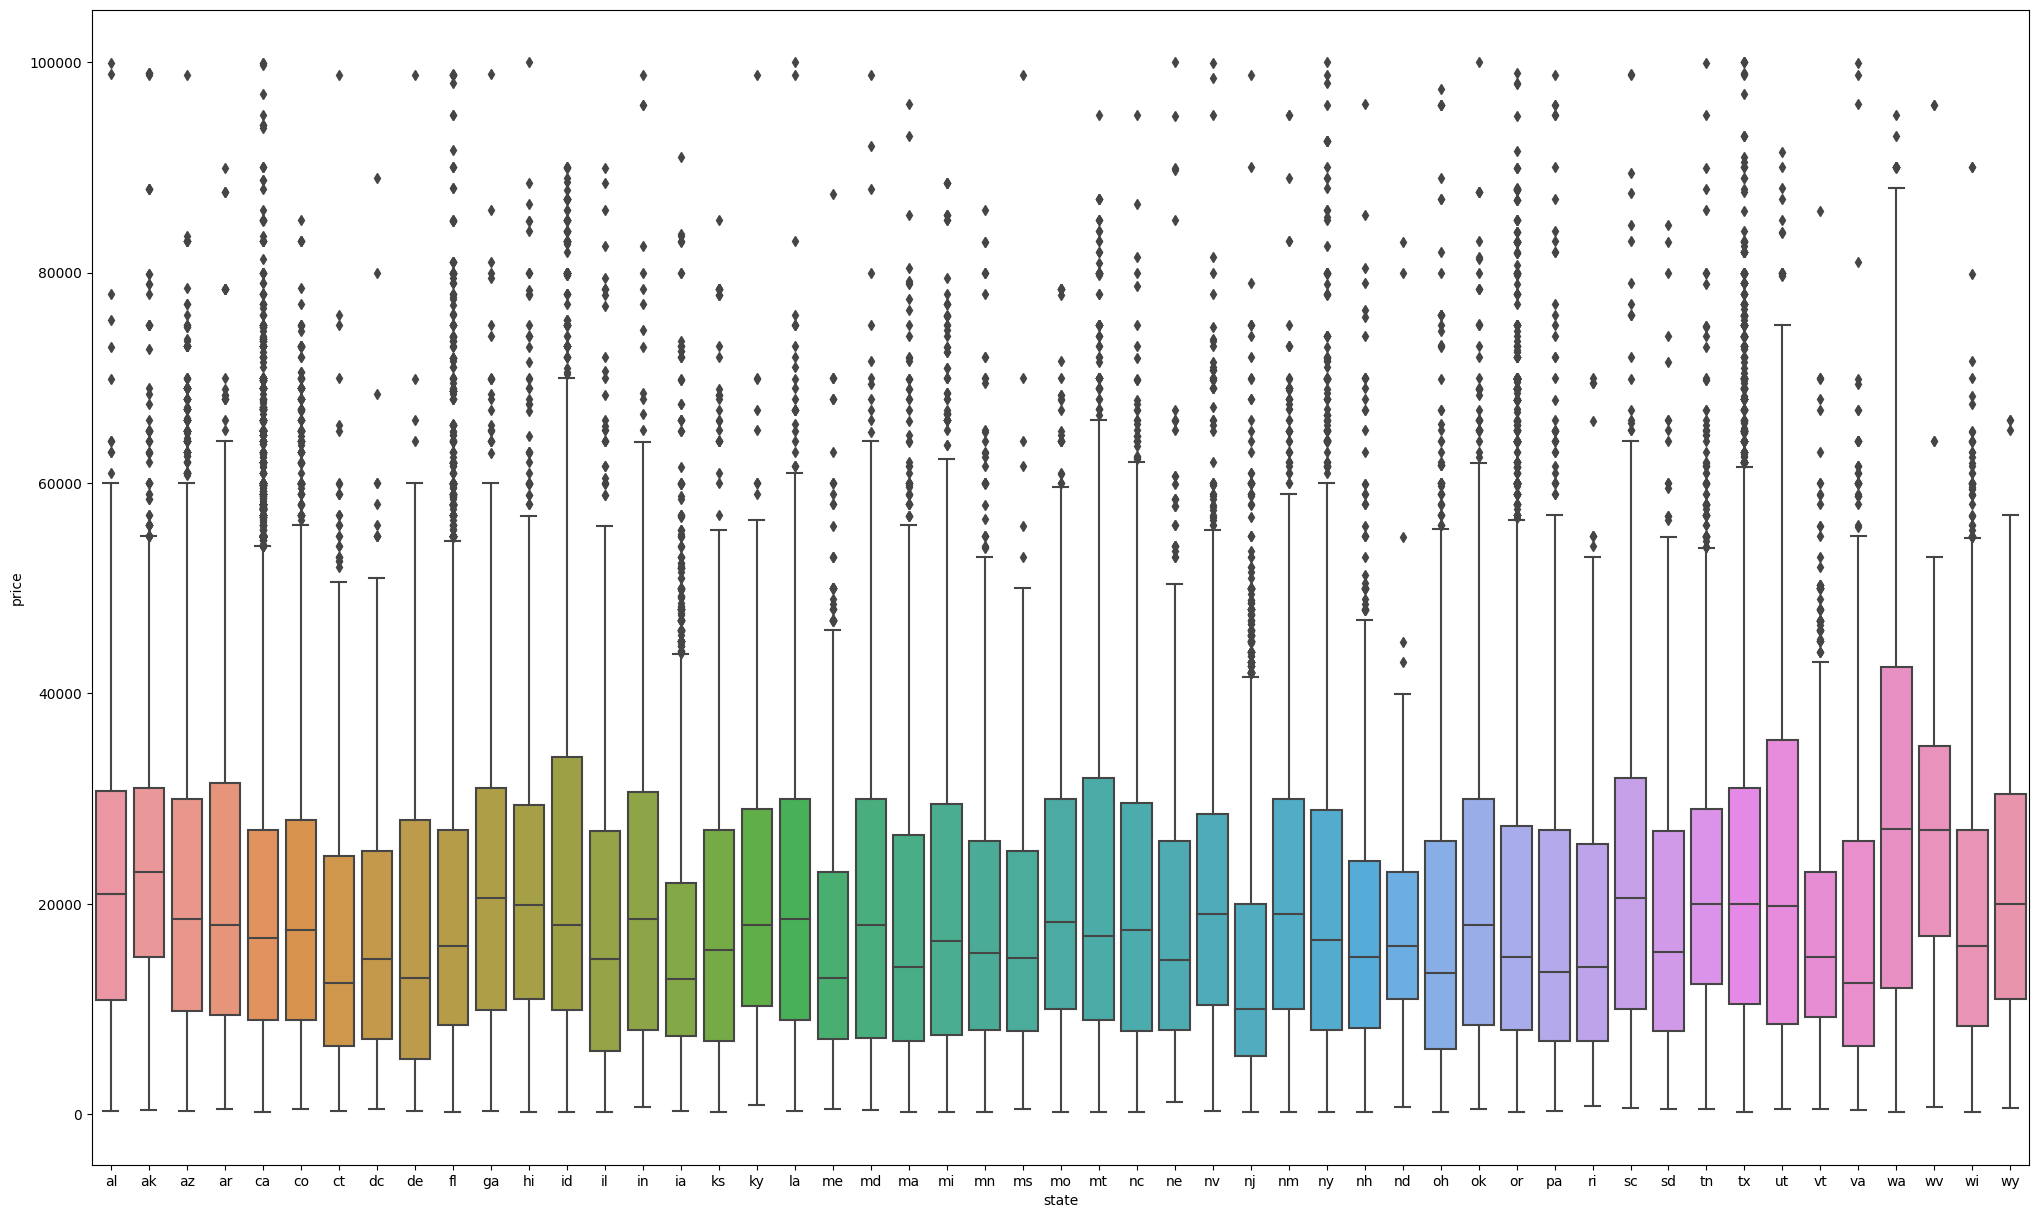

In [20]:
#Boxplot showing the price of vehicles based on the state
#plt.figure is used to make the results clear 
#sb.boxplot is used to make a boxplot with state on the x-axis and price on the y-axis
#plt.show then displayes the boxplot
fig = plt.figure(figsize=(25,15))
sb.boxplot(data=df, x ='state', y = 'price')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

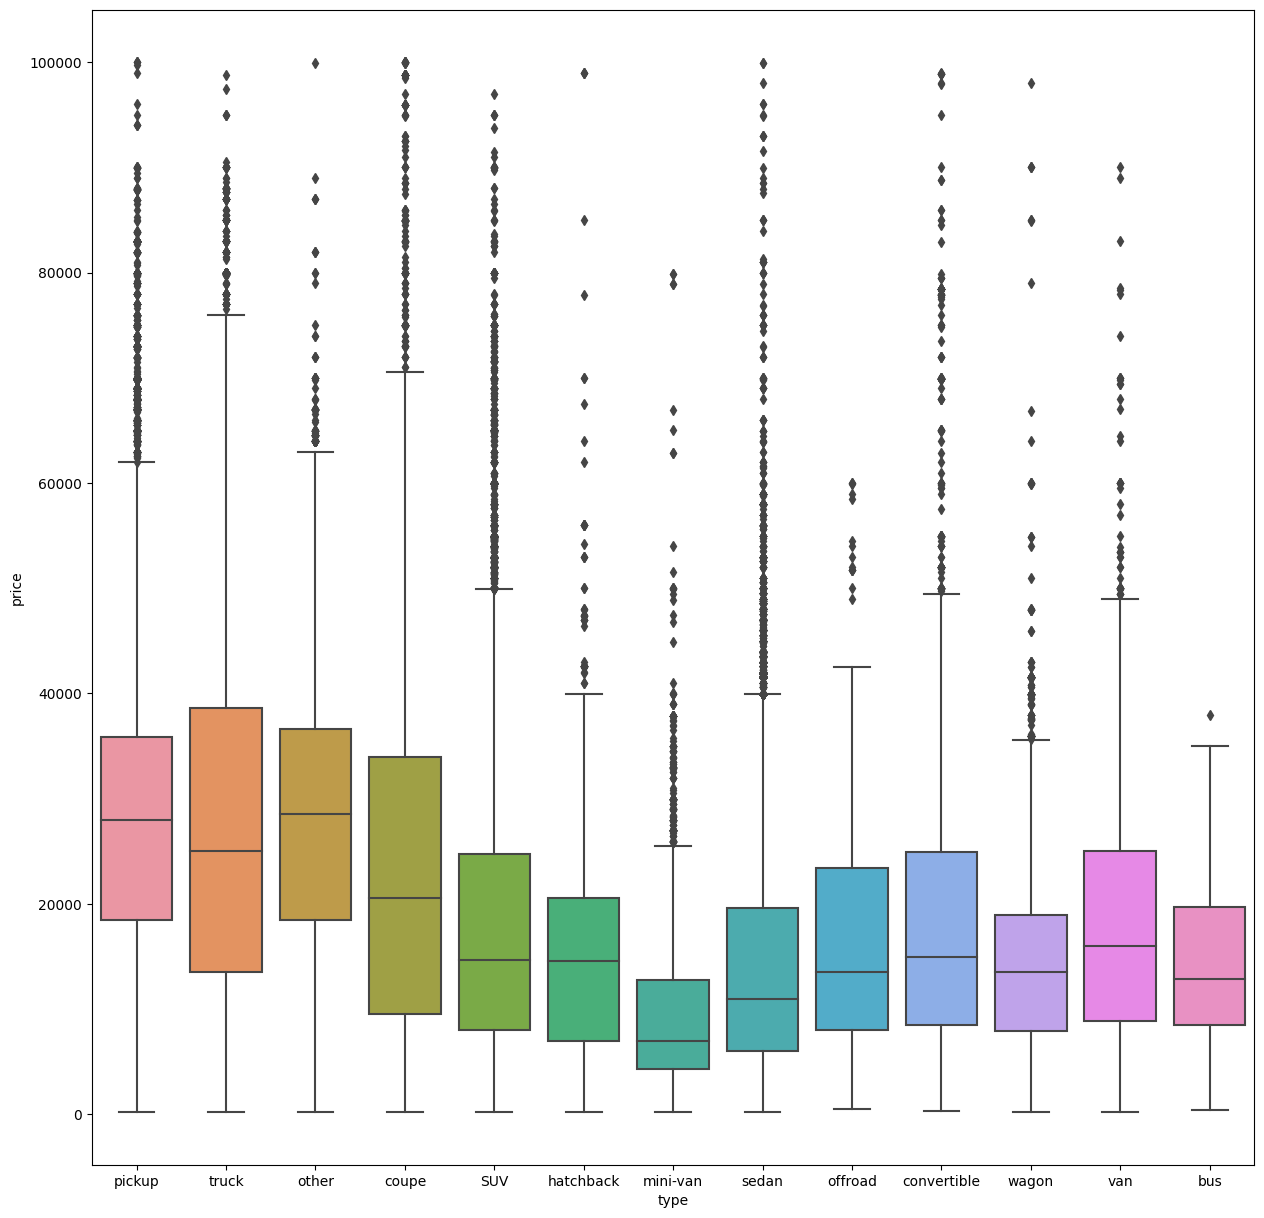

In [21]:
#Boxplot shoing the price of vehicles based on there type
#Again plt.figure is used to size it correctly 
#Same as above but x-axis is type and y-axis is price
fig = plt.figure(figsize=(15,15))
sb.boxplot(data=df, x ='type', y = 'price')
plt.show

C:\Users\Darren\AppData\Local\Temp\ipykernel_17508\1167786525.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr(), annot=True)


<AxesSubplot: >

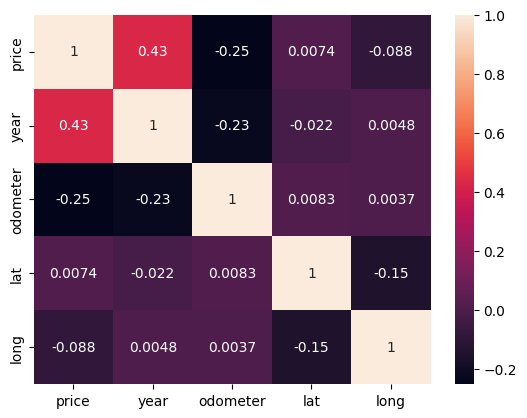

In [22]:
#Heatmap to show the correlation between columns in the dataset
sb.heatmap(df.corr(), annot=True)

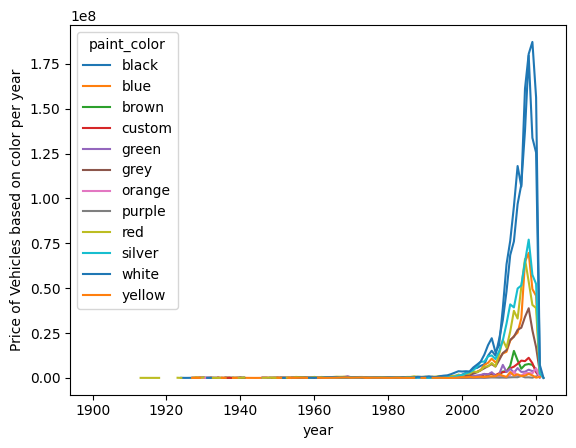

In [23]:
#This is the Price of Vehicles based on the year of the vehicle and the colour of the vehicle using a Pivot Table
df.pivot_table('price', index='year', columns='paint_color', aggfunc='sum').plot()
plt.ylabel('Price of Vehicles based on color per year');

<AxesSubplot: xlabel='price', ylabel='Count'>

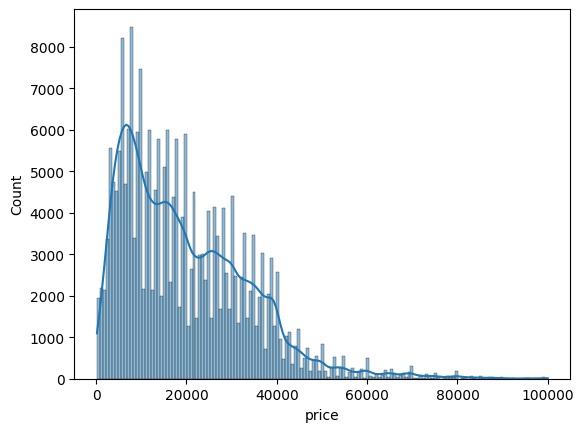

In [24]:
#Histogram showing the number of vehicles based on the pricing of the vehicle
sb.histplot(data=df, x="price", kde=True)

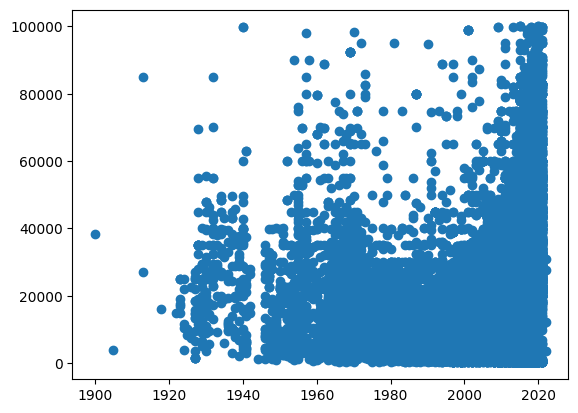

In [25]:
#Using a Scatter plot to show how the price increases for vintage cars and new cars yet dips between about 1970 to 2010
#Also i found very interesting is that gap in the 1940s. This would be because production of vehicles froze in Jan. 1, 1942 
#due to World War 2.
plt.scatter(df.year, df.price)

In [26]:

#Here i have to drop a lot of data as my pc can not handle the ammount and im getting memory errors


df.drop([ 'region', 'transmission' , 'type' , 'description','state', 'lat', 'long' , 'posting_date' ], axis=1, inplace=True)
df = df.loc[(df["year"]>2000)]
df = df.loc[(df["year"]<2021)]

#I had to further reduce the size of the dataset by quite a bit as my PC can no allocate enough memory 
df = df.loc[(df["price"] >500)]

df = df.loc[(df["odometer"] >1000)]
df = df.loc[(df["odometer"] <250000)]

#121064 rows was still far to much for my pc to handle
#I would have much rather used the entire dataset but it wasnt possible so i had to cut it down to 22091

df.drop(df.tail(190000).index, inplace=True)

print(len(df))

22091


In [27]:
#https://medium.com/@kamendamov/car-price-prediction-using-regression-developing-and-deploying-a-machine-learning-web-app-6564ee24c25f
#looping through the columns in the dataset to assign each column to either categorical or numerical
categorical = []
numerical = []

for col in df.columns:
    if df[col].dtypes == 'object':
        categorical.append(col)
    else:
        numerical.append(col)


In [28]:

x1 = pd.get_dummies(df[categorical],drop_first=False)
x2 = df[numerical]
X = pd.concat([x2,x1], axis=1)
X.drop('price',axis=1, inplace = True)

In [29]:
#Create dummies file data in X
#Aswell as cols_use
X.to_csv('dummy_df')
cols_use = X.columns
X.to_csv('cols_use')
X = X.values

In [30]:
#Splitting the test data and the training data
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.333, random_state=1)
#Using Standard Scaler to scale the data values to fit
sc= StandardScaler()
print(len(x1.columns))
X_train[:, :(len(x1.columns))]= sc.fit_transform(X_train[:, :(len(x1.columns))])
X_test[:, :(len(x1.columns))]= sc.transform(X_test[:, :(len(x1.columns))])
len(X_train[0])

4350


4352

In [31]:
#https://www.kaggle.com/code/qusaybtoush1990/car-price-prediction
#Using LinearRegression ,DecisionTreeRegressor ,RandomForestRegressor to predict the value
reg = [LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor()]
d = {}
for i in reg:
    i.fit(X_train,y_train)
    ypredict = i.predict(X_test)
    print(i,"=",r2_score(y_test,ypredict)*100)
    d.update({str(i):i.score(X_test,y_test)*100})

LinearRegression() = -1.6995727226251415e+27
DecisionTreeRegressor() = 78.85891282117873
RandomForestRegressor() = 84.08328387713271


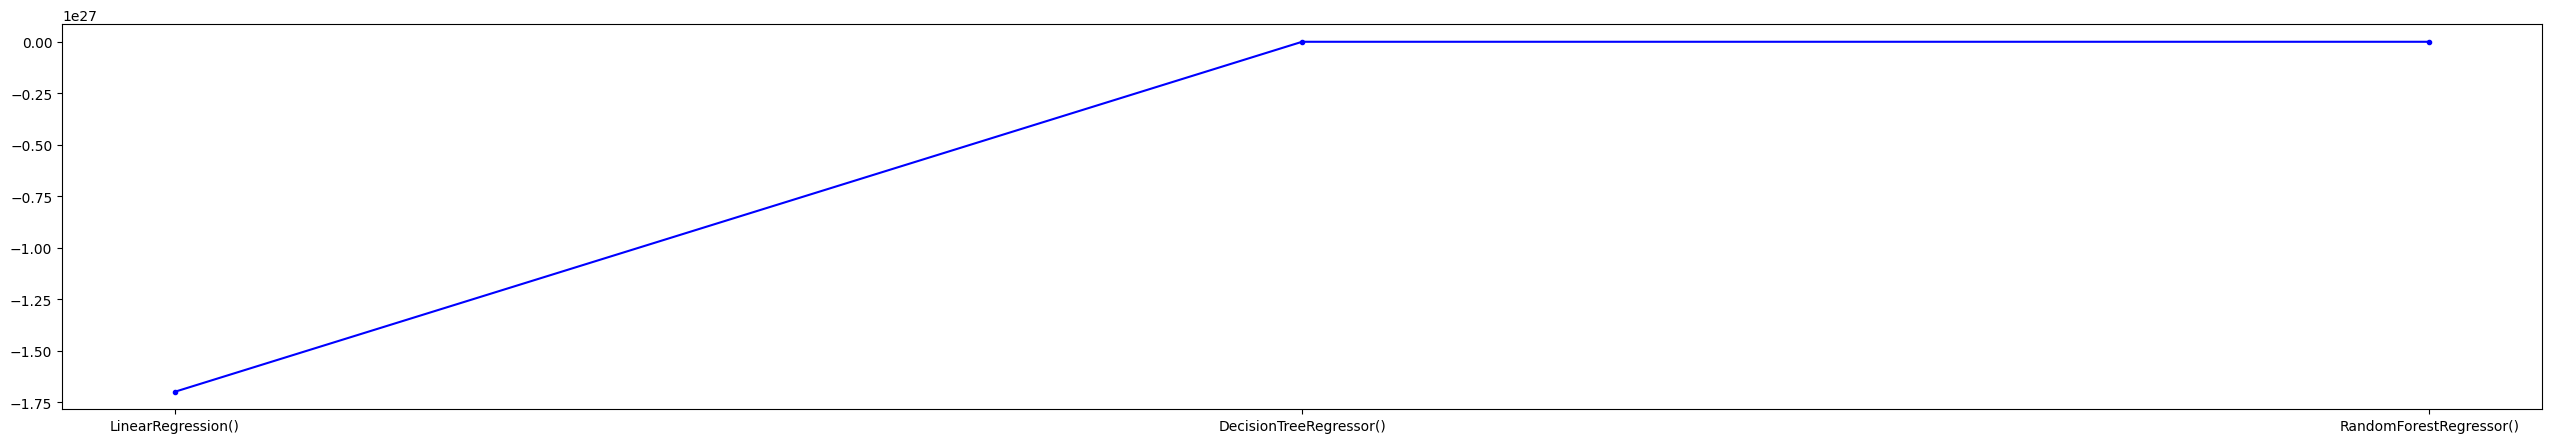

In [32]:
#This is a plot to show the results
plt.figure(figsize=(32, 5))
plt.plot(d.keys(),d.values(),marker='.',color='blue')
plt.show()

In [33]:
#Discussion
#This dataset was very large at 400000+ rows and 26 columns, This made it quite difficult to work with as many changes i made
#took a long time to check if they were correct as it would take a lot of processing time and storage time to complete certian 
#task, so i found myself often running the project and waiting for quite a while to get the result i was looking for.
#It wasnt untill the size of the dataset actually caused issues with it not working that i had to drop a lot of rows
#from the dataset in order to get it to work
#I really didnt want to do this as i wanted to use the entire dataset minus the null values and irrelevant columns but it
#just wasnt possible unfortunatly.
#Data pre processing wasnt as bad as expected as i used a heatmap to find where many of the null values were and was able to address them'
#Data visualization was good as i could get a lot of usefull information from the dataset. One of the more interesting things 
#i found was the price of vehicles based on there year using a scatterplot. You could can see that there is a price rise
#for vintage vehicles around and then a dip for a while untill the newer vehicles 2010+
#Something very interesting i found in that scatterplot also was the gap of cars registered in the 1940s. I was curious about this
#and after further reseach i found out that vehicle production stopped in 1942 due to World War 2 and this is the gap you see in 
#the scatterplot

In [34]:
#Conclusion
#In conclussion i believe that with the dataset having to be reduced down to only 20000 i was able to achieve decent results
#with the regression test. If i were to do this again i may chose a smaller dataset to work with or make sure that my pc can handle
#the size of the dataset im using.
#Also many of the columns i found in the dataset were not very relavent such as longitude and latitude. Other columns such as engine_size 
#may have been more appropriate but as this dataset was pulled from Craigslist listing i can understand why these 
#columns were there and not more meaningfull columns


In [35]:
#I believe i was able show many aspects of the dataset in this project and some interesting fasts about it aswell as come up
#reasonable test results from my regression testing

In [36]:
#https://www.kaggle.com/code/qusaybtoush1990/car-price-prediction
#https://medium.com/@kamendamov/car-price-prediction-using-regression-developing-and-deploying-a-machine-learning-web-app-6564ee24c25f
#https://www.w3schools.com/python/matplotlib_pie_charts.asp